<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/u4_agrupar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unidad 4 - Agrupar

Basada en los los libros:
- Capitulo 10 del libro Python for Data Analysis
- Capitulo 3 del libro Python Data Science Handbook

# Inicialización

In [ ]:
# import paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# options numpy
np.random.seed(12345)

pd.set_option('display.min_rows', 30)
pd.set_option('display.max_rows', 100)


Datos de premios nobel: https://www.kaggle.com/datasets/imdevskp/nobel-prize/

In [ ]:
nobel_complete = pd.read_csv("nobel_prize_v9.csv")
nobel_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   awardYear                   950 non-null    int64 
 1   category                    950 non-null    object
 2   categoryFullName            950 non-null    object
 3   sortOrder                   950 non-null    int64 
 4   portion                     950 non-null    object
 5   prizeAmount                 950 non-null    int64 
 6   prizeAmountAdjusted         950 non-null    int64 
 7   dateAwarded                 533 non-null    object
 8   prizeStatus                 950 non-null    object
 9   motivation                  950 non-null    object
 10  categoryTopMotivation       20 non-null     object
 11  award_link                  950 non-null    object
 12  id                          950 non-null    int64 
 13  name                        950 non-null    object

In [ ]:
nobel_complete

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,1/3,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,...,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,1/3,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,...,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN
5,2019,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,1,1/3,9000000,9000000,2019-10-14,received,for their experimental approach to alleviating...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Massachusetts Institute of Technology (MIT), C...",NaN,NaN,NaN
6,2019,Peace,The Nobel Peace Prize,1,1,9000000,9000000,2019-10-11,received,for his efforts to achieve peace and internati...,...,NaN,NaN,NaN,Individual,NaN,NaN,NaN,NaN,NaN,NaN
7,2009,Chemistry,The Nobel Prize in Chemistry,3,1/3,10000000,10958504,2009-10-07,received,for studies of the structure and function of t...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Weizmann Institute of Science, Rehovot, Israel",NaN,NaN,NaN
8,2011,Physics,The Nobel Prize in Physics,3,1/4,10000000,10545557,2011-10-04,received,for the discovery of the accelerating expansio...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Johns Hopkins University, Baltimore, MD, USA","Space Telescope Science Institute, Baltimore, ...",NaN,NaN
9,1939,Chemistry,The Nobel Prize in Chemistry,1,1/2,148822,4227898,NaN,received,for his work on sex hormones,...,NaN,NaN,NaN,Individual,NaN,NaN,Kaiser-Wilhelm-Institut (now Max-Planck-Instit...,"Berlin University, Berlin, Germany",NaN,NaN


In [ ]:
nobel = nobel_complete[['awardYear', 'category', 'prizeAmount', 'prizeAmountAdjusted', 'name', 'gender', 'birth_continent']]
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   awardYear            950 non-null    int64 
 1   category             950 non-null    object
 2   prizeAmount          950 non-null    int64 
 3   prizeAmountAdjusted  950 non-null    int64 
 4   name                 950 non-null    object
 5   gender               923 non-null    object
 6   birth_continent      923 non-null    object
dtypes: int64(3), object(4)
memory usage: 52.1+ KB


In [ ]:
nobel

,awardYear,category,prizeAmount,prizeAmountAdjusted,name,gender,birth_continent
0,2001,Economic Sciences,10000000,12295082,A. Michael Spence,male,North America
1,1975,Physics,630000,3404179,Aage N. Bohr,male,Europe
2,2004,Chemistry,10000000,11762861,Aaron Ciechanover,male,Asia
3,1982,Chemistry,1150000,3102518,Aaron Klug,male,Europe
4,1979,Physics,800000,2988048,Abdus Salam,male,Asia
5,2019,Economic Sciences,9000000,9000000,Abhijit Banerjee,male,Asia
6,2019,Peace,9000000,9000000,Abiy Ahmed Ali,male,Africa
7,2009,Chemistry,10000000,10958504,Ada E. Yonath,female,Asia
8,2011,Physics,10000000,10545557,Adam G. Riess,male,North America
9,1939,Chemistry,148822,4227898,Adolf Butenandt,male,Europe


In [ ]:
nobel["prizeAmount"].mean()

3460596.127368421

In [ ]:
# que categorias hay?
nobel["category"].unique()

array(['Economic Sciences', 'Physics', 'Chemistry', 'Peace',
       'Physiology or Medicine', 'Literature'], dtype=object)

In [ ]:
# cuantos premios hay de cada categoria?
nobel["category"].value_counts()

,count
category,
Physiology or Medicine,219
Physics,213
Chemistry,184
Peace,134
Literature,116
Economic Sciences,84


## Cuanto fue el total de premios por cada categoría?

---



In [ ]:
grouped = nobel.groupby("category")


In [ ]:
grouped

In [ ]:
grouped.indices

{'Chemistry': array([  2,   3,   7,   9,  10,  11,  13,  14,  15,  17,  19,  39,  62,
         64,  66,  71,  75,  80,  81,  86,  92, 104, 107, 112, 129, 135,
        153, 169, 175, 178, 181, 188, 197, 199, 203, 210, 215, 223, 227,
        239, 247, 249, 258, 264, 265, 268, 272, 274, 280, 282, 284, 289,
        296, 298, 310, 311, 317, 318, 337, 341, 343, 348, 352, 357, 362,
        365, 366, 372, 374, 384, 394, 395, 396, 415, 416, 419, 434, 440,
        442, 444, 446, 448, 450, 455, 456, 459, 461, 463, 465, 469, 475,
        504, 505, 508, 518, 522, 523, 524, 539, 549, 558, 559, 563, 567,
        571, 572, 585, 591, 596, 599, 627, 630, 632, 641, 643, 644, 648,
        659, 661, 666, 667, 668, 671, 673, 679, 681, 686, 713, 715, 717,
        719, 720, 722, 723, 725, 726, 729, 732, 738, 742, 744, 746, 751,
        756, 759, 763, 766, 773, 776, 798, 810, 813, 814, 817, 827, 828,
        829, 832, 839, 848, 853, 855, 862, 866, 880, 885, 886, 888, 889,
        892, 894, 897, 902, 904, 914, 

In [ ]:
print(len(grouped))

6


In [ ]:
# grouped se puede iterar!
for (nombre, grupo) in grouped:
    print(f'Head de {nombre}:')
    print(30*'-')
    print(grupo.head(5), '\n\n')

Head de Chemistry:
------------------------------
    awardYear   category  prizeAmount  prizeAmountAdjusted               name  \
2        2004  Chemistry     10000000             11762861  Aaron Ciechanover   
3        1982  Chemistry      1150000              3102518         Aaron Klug   
7        2009  Chemistry     10000000             10958504      Ada E. Yonath   
9        1939  Chemistry       148822              4227898    Adolf Butenandt   
10       1905  Chemistry       138089              7615202   Adolf von Baeyer   

    gender birth_continent  
2     male            Asia  
3     male          Europe  
7   female            Asia  
9     male          Europe  
10    male          Europe   


Head de Economic Sciences:
------------------------------
    awardYear           category  prizeAmount  prizeAmountAdjusted  \
0        2001  Economic Sciences     10000000             12295082   
5        2019  Economic Sciences      9000000              9000000   
45       2012  Eco

In [ ]:
phy = grouped.get_group('Physics')


In [ ]:
phy

,awardYear,category,prizeAmount,prizeAmountAdjusted,name,gender,birth_continent
1,1975,Physics,630000,3404179,Aage N. Bohr,male,Europe
4,1979,Physics,800000,2988048,Abdus Salam,male,Asia
8,2011,Physics,10000000,10545557,Adam G. Riess,male,North America
20,1907,Physics,138796,7033581,Albert A. Michelson,male,Europe
23,1921,Physics,121573,2532771,Albert Einstein,male,Europe
24,2007,Physics,10000000,11301989,Albert Fert,male,Europe
30,1964,Physics,273000,2828039,Aleksandr M. Prokhorov,male,Oceania
32,2003,Physics,10000000,11807305,Alexei Abrikosov,male,Europe
38,1966,Physics,300000,2784653,Alfred Kastler,male,Europe
51,2010,Physics,10000000,10819388,Andre Geim,male,Europe


In [ ]:
grouped.sum(numeric_only=True)

,awardYear,prizeAmount,prizeAmountAdjusted
category,,,
Chemistry,362912,667787418,1151447726
Economic Sciences,167674,512891000,658373449
Literature,227468,289282102,649397731
Peace,263248,418733807,825963521
Physics,419837,725890928,1296526352
Physiology or Medicine,431508,672981066,1256687857


In [ ]:
grouped["prizeAmount"].sum()

,prizeAmount
category,
Chemistry,667787418
Economic Sciences,512891000
Literature,289282102
Peace,418733807
Physics,725890928
Physiology or Medicine,672981066


In [ ]:
grouped[["prizeAmount", "prizeAmountAdjusted"]].mean()

,prizeAmount,prizeAmountAdjusted
category,,
Chemistry,3.629279e+06,6.257868e+06
Economic Sciences,6.105845e+06,7.837779e+06
Literature,2.493811e+06,5.598256e+06
Peace,3.124879e+06,6.163907e+06
Physics,3.407939e+06,6.086978e+06
Physiology or Medicine,3.072973e+06,5.738301e+06


# Group en pandas

In [ ]:
dx = pd.DataFrame({
    "key":list("ABCABC"),
    "data":[1,2,3,4,5,6]
})

dx


,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


### Conceptos: Split - Apply - Combine

In [ ]:
# agrupamos
dx_grouped = dx.groupby("key")
dx_grouped

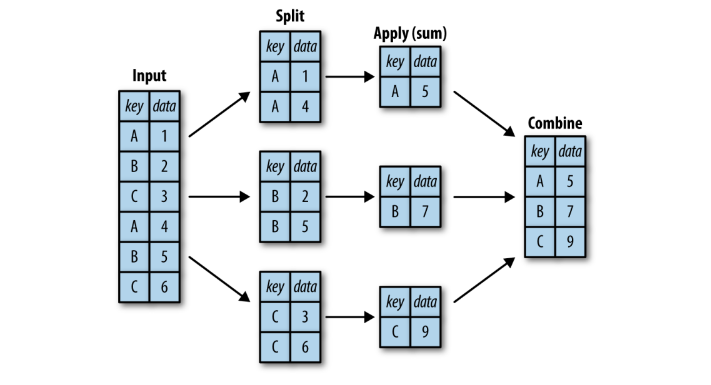

In [ ]:
dx_grouped.indices


{'A': array([0, 3]), 'B': array([1, 4]), 'C': array([2, 5])}

In [ ]:
# aplicamos una funcion de agregacion sum()
dx_grouped.sum()

,data
key,
A,5
B,7
C,9


In [ ]:
dx.groupby("key").sum()

,data
key,
A,5
B,7
C,9


# Agrupar y agregar

Pandas permite agrupar, por:

* un nombre o varios nombres de columnas
* lista de valores,
* serie
* un diccionario
* una funcion


In [ ]:
df1 = pd.DataFrame({"key1" : ["a", "a", "a", "a", None, "b", "b", "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, 2, 1, 1, 2, None, 1], dtype="Int64"),
                   "data1" : np.random.standard_normal(11),
                   "data2" : np.random.standard_normal(11)})
df1

,key1,key2,data1,data2
0,a,1,-0.204708,-1.296221
1,a,2,0.478943,0.274992
2,a,1,-0.519439,0.228913
3,a,2,-0.555730,1.352917
4,None,1,1.965781,0.886429
5,b,2,1.393406,-2.001637
6,b,1,0.092908,-0.371843
7,b,1,0.281746,1.669025
8,b,2,0.769023,-0.438570
9,a,<NA>,1.246435,-0.539741


In [ ]:
df1.groupby("key1")

In [ ]:
# df1.groupby("key1").indices

In [ ]:
df1.groupby("key1").mean()

,key2,data1,data2
key1,,,
a,1.5,0.089100,0.004172
b,1.5,0.634271,-0.285756


In [ ]:
means_jg = df1.groupby(["key1", "key2"]).mean()
means_jg

data1     data2
key1 key2                    
a    1    -0.362073 -0.533654
     2    -0.038393  0.813954
b    1     0.187327  0.648591
     2     1.081214 -1.220104

In [ ]:
df1.groupby(["key1", "key2"]).mean()

data1     data2
key1 key2                    
a    1    -0.362073 -0.533654
     2    -0.038393  0.813954
b    1     0.187327  0.648591
     2     1.081214 -1.220104

In [ ]:
df1.groupby(["key1"]).mean()

,key2,data1,data2
key1,,,
a,1.5,0.089100,0.004172
b,1.5,0.634271,-0.285756


In [ ]:
df1.groupby("key1", dropna=False).mean()

,key2,data1,data2
key1,,,
a,1.5,0.089100,0.004172
b,1.5,0.634271,-0.285756
NaN,1.0,1.486485,0.681707


In [ ]:
df1.groupby(["key1", "key2"], dropna=False).mean()

data1     data2
key1 key2                    
a    1    -0.362073 -0.533654
     2    -0.038393  0.813954
     <NA>  1.246435 -0.539741
b    1     0.187327  0.648591
     2     1.081214 -1.220104
NaN  1     1.486485  0.681707

## Agrupar con dict, listas o series.


In [ ]:
# creamos un ejemplo
people = pd.DataFrame(np.random.standard_normal((5, 5)),
                      columns=["a", "b", "c", "d", "e"],
                      index=["Joe", "Steve", "Wanda", "Jill", "Trey"])
people.iloc[2:3, [1, 2]] = np.nan # agregamos algunos NA
people

,a,b,c,d,e
Joe,3.248944,-1.021228,-0.577087,0.124121,0.302614
Steve,0.523772,0.000940,1.343810,-0.713544,-0.831154
Wanda,-2.370232,NaN,NaN,0.560145,-1.265934
Jill,0.119827,-1.063512,0.332883,-2.359419,-0.199543
Trey,-1.541996,-0.970736,-1.307030,0.286350,0.377984


In [ ]:
# Si pasamos un diccionario indicamos cada indice en que grupo cae
grp_names = {"Joe": "AA", "Steve": "AA", "Wanda": "BB", "Jill": "BB", "Trey": "BB"}
gdict = people.groupby(grp_names)
gdict.sum()

,a,b,c,d,e
AA,3.772716,-1.020287,0.766722,-0.589423,-0.528540
BB,-3.792400,-2.034248,-0.974148,-1.512924,-1.087493


In [ ]:
ix = ["AA", "AA", "BB", "BB", "BB"]
gseries = people.groupby(ix)
gseries.count()

,a,b,c,d,e
AA,2,2,2,2,2
BB,3,2,2,3,3


In [ ]:
ss = pd.Series(data = ["AA", "AA", "BB", "BB", "BB"],
               index = people.index)

In [ ]:
ss

,0
Joe,AA
Steve,AA
Wanda,BB
Jill,BB
Trey,BB


### agrupar con una funcion

In [ ]:
people

,a,b,c,d,e
Joe,3.248944,-1.021228,-0.577087,0.124121,0.302614
Steve,0.523772,0.000940,1.343810,-0.713544,-0.831154
Wanda,-2.370232,NaN,NaN,0.560145,-1.265934
Jill,0.119827,-1.063512,0.332883,-2.359419,-0.199543
Trey,-1.541996,-0.970736,-1.307030,0.286350,0.377984


In [ ]:
def tiene_J(val):
  print(val)
  if "J" in val:
    return "CJ"
  else:
    return "SJ"

In [ ]:
g2 = people.groupby(tiene_J).max()
g2

Joe
Steve
Wanda
Jill
Trey


,a,b,c,d,e
CJ,3.248944,-1.021228,0.332883,0.124121,0.302614
SJ,0.523772,0.000940,1.343810,0.560145,0.377984


# Seleccionar columnas

In [ ]:
df1

,key1,key2,data1,data2
0,a,1,-0.204708,-1.296221
1,a,2,0.478943,0.274992
2,a,1,-0.519439,0.228913
3,a,2,-0.555730,1.352917
4,None,1,1.965781,0.886429
5,b,2,1.393406,-2.001637
6,b,1,0.092908,-0.371843
7,b,1,0.281746,1.669025
8,b,2,0.769023,-0.438570
9,a,<NA>,1.246435,-0.539741


In [ ]:
df1.groupby(["key1"]).sum()

,key2,data1,data2
key1,,,
a,6,0.445501,0.020859
b,6,2.537082,-1.143024


In [ ]:
# ejemplo agrupamos por key1, seleccionamos columna data1 y la sumarizamos
df1.groupby("key1")["data1"].sum()

,data1
key1,
a,0.445501
b,2.537082


In [ ]:
df1.groupby(["key1"])["data1"]

In [ ]:
df1.groupby(["key1"])["data1"].sum()

,data1
key1,
a,0.445501
b,2.537082


In [ ]:
df1.groupby(["key1"])[["data1"]]

In [ ]:
df1.groupby(["key1"])[["data1"]].sum()

,data1
key1,
a,0.445501
b,2.537082


In [ ]:
df1.groupby(["key1"])[["data1", "data2"]].sum()

,data1,data2
key1,,
a,0.445501,0.020859
b,2.537082,-1.143024


# Aplicar: agg()

In [ ]:
rng = np.random.RandomState(0)

df = pd.DataFrame({
    'key': ['A', 'B', 'C', 'A', 'B', 'C'],
    'data1': range(6),
    'data2': rng.randint(0, 10, 6)},
    columns = ['key', 'data1', 'data2'])

df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [ ]:
df.groupby('key').agg(['min', 'median','max'])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [ ]:
df.groupby('key').agg([("Mínimo", 'min'), ("Promedio", 'median') , ("Máximo", 'max')])

data1                  data2                
    Mínimo Promedio Máximo Mínimo Promedio Máximo
key                                              
A        0      1.5      3      3      4.0      5
B        1      2.5      4      0      3.5      7
C        2      3.5      5      3      6.0      9

In [ ]:
df.groupby('key').agg(
    {'data1': 'min',
     'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [ ]:
def peak_to_peak(arr):
  return arr.max() - arr.min()

df.groupby('key').agg(peak_to_peak)

,data1,data2
key,,
A,3,2
B,3,7
C,3,6
